## Importing Libraries ####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [2]:
dataset = pd.read_csv('new_appdata.csv')

## Data Pre-Processing ####

Splitting Independent and Response Variables

In [3]:
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [6]:
train_identifier = X_train["user"]
X_train.drop("user",axis=1,inplace = True)
test_identifier = X_test["user"]
X_test.drop("user", axis=1 ,inplace = True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
test_identifier

11841    239786
19602    279644
45519     98290
25747    170150
42642    237568
          ...  
25091    143036
27853     91158
47278    248318
37020    142418
2217     279355
Name: user, Length: 10000, dtype: int64

In [ ]:
 Balancing the Training Set<br>
mport random<br>
_train.value_counts()<br>
<br>
os_index = y_train[y_train.values == 1].index<br>
eg_index = y_train[y_train.values == 0].index<br>
<br>
f len(pos_index) > len(neg_index):<br>
   higher = pos_index<br>
   lower = neg_index<br>
lse:<br>
   higher = neg_index<br>
   lower = pos_index<br>
<br>
andom.seed(0)<br>
igher = np.random.choice(higher, size=len(lower))<br>
ower = np.asarray(lower)<br>
ew_indexes = np.concatenate((lower, higher))<br>
<br>
_train = X_train.loc[new_indexes,]<br>
_train = y_train[new_indexes]

Removing Identifiers

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model Building ####

## Fitting Model to the Training Set

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting Test Set

In [12]:
y_pred = classifier.predict(X_test)

## Evaluating Results

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy score :{accuracy_score(y_test, y_pred)}")
print(f"Precision score : {precision_score(y_test, y_pred)}") # tp / (tp + fp)
print(f"Recall Score : {recall_score(y_test, y_pred)}") # tp / (tp + fn)
print(f"F1 score : {f1_score(y_test, y_pred)}")

Accuracy score :0.768
Precision score : 0.7617422721798475
Recall Score : 0.7700892857142857
F1 score : 0.7658930373360243


Test Data Accuracy: 0.7680


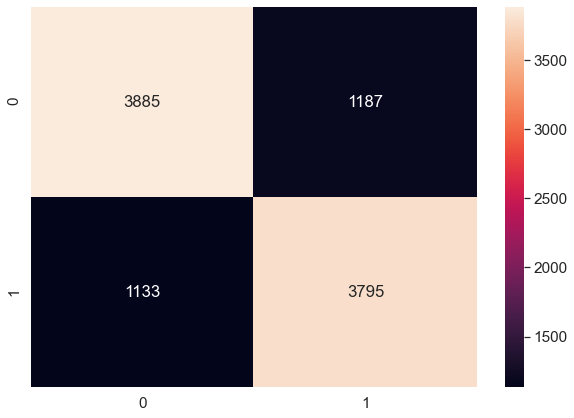

In [14]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Applying k-Fold Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.009)


In [24]:
final_results = pd.concat([y_test , test_identifier],axis = 1).dropna()

In [25]:
final_results

,enrolled,user
11841,1,239786
19602,1,279644
45519,0,98290
25747,1,170150
42642,1,237568
...,...,...
25091,1,143036
27853,1,91158
47278,0,248318
37020,1,142418


In [27]:
final_results["Predicted Values"] = y_pred
final_results[["user","enrolled","Predicted Values"]].reset_index(drop=True)

,user,enrolled,Predicted Values
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


## Analysing Coefficients

In [29]:
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032715
1,hour,-0.003747
2,age,-0.149793
3,numscreens,-0.131250
4,minigame,-0.026619
5,used_premium_feature,-0.066105
6,liked,0.010852
7,location,-0.028831
8,Institutions,-0.062297
9,VerifyPhone,0.650615


## Model Tuning ####

 Grid Search (Round 1)

In [30]:
from sklearn.model_selection import GridSearchCV

Select Regularization Method

In [31]:
penalty = ['l1', 'l2']

Create regularization hyperparameter space

In [32]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Combine Parameters

In [33]:
parameters = dict(C=C, penalty=penalty)

In [34]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [     nan 0.765         nan 0.767325      nan 0.7671        nan 0.767175
      nan 0.76715       nan 0.76715       nan 0.76715 ]
  category=UserWarning


Took 14.89 seconds


In [35]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7673249999999999, {'C': 0.01, 'penalty': 'l2'})

 Grid Search (Round 2)

Select Regularization Method

In [36]:
penalty = ['l1', 'l2']

Create regularization hyperparameter space

In [37]:
C = [0.1, 0.5, 0.9, 1, 2, 5]

Combine Parameters

In [38]:
parameters = dict(C=C, penalty=penalty)

In [39]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [     nan 0.7671        nan 0.767225      nan 0.767175      nan 0.767175
      nan 0.767175      nan 0.767175]
  category=UserWarning


Took 8.46 seconds


In [40]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

0.767225